In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Shortest paths: {1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 4], 6: [1, 2, 3, 6], 5: [1, 2, 4, 5]}


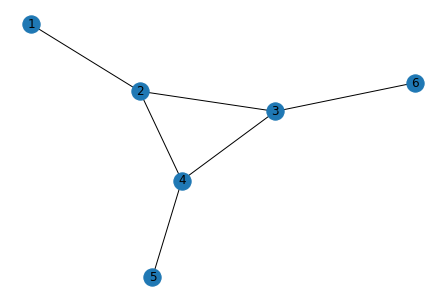

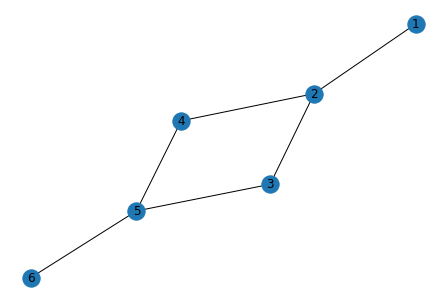

Shortest paths: {4: [4], 2: [4, 2], 5: [4, 5], 1: [4, 2, 1], 3: [4, 2, 3], 6: [4, 5, 6]}


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G1, G2 = nx.Graph(), nx.Graph()

G1.add_edges_from([
    (1, 2),
    (2, 3),
    (2, 4),
    (3, 4),
    (3, 6),
    (4, 5),
])

G2.add_edges_from([
    (1,2),
    (2,4),
    (2,3),
    (3,5),
    (4,5),
    (5,6)
])

paths1=nx.single_source_shortest_path(G1,1)
paths2=nx.single_source_shortest_path(G2,4)

plt.figure(1)
nx.draw(G1, with_labels=True)
print(f'Shortest paths: {paths1}')

plt.figure(2)
nx.draw(G2, with_labels=True)
plt.show()
print(f'Shortest paths: {paths2}')

In [3]:
from collections import defaultdict
import math


class Node:
    """Node class to store node and relevant information
    
    radius : lowest radius that this node is a part of
    measure : assigned measure for node
    path : shortest path from source
    name : label for node
    """
    
    def __init__(self):
        self.radius = 0
        self.measure = 0
        self.path = []
        self.name = None

    def __str__(self):
        return f"node {self.name}, radius {self.radius}"
    
    def __repr__(self):
        return f"node {self.name}, radius {self.radius}, measure {self.measure}"

    
def populate_node_list(shortest_paths):
    """Populate a list of nodes from a shortest_path dict
    
    Takes input typically from nx.single_source_shortest_path()
    Returns a list of Node objects
    """
    node_list = []
    for node in shortest_paths:
        n = Node()
        n.name = node
        n.path = shortest_paths[node]
        n.radius = len(shortest_paths[node]) - 1
        node_list.append(n)
    return node_list

        
def add_measures(list_of_nodes, measures):
    """Add measures to node_list
    
    Takes a list of Node objects and list of measure values
    """
    for i, n in enumerate(list_of_nodes):
        n.measure = measures[n.name - 1]


def get_CRD(list_of_nodes):
    """Calculate Cumulative Radial Distributions
    
    Takes a list of Node objects as an argument
    Returns a defaultdict radius->radial distribution
    """
    M = defaultdict(int)
    for n in list_of_nodes:
        M[n.radius] += n.measure
    for i in range(len(M) - 1):
        M[i + 1] += M[i]
    return M


def ensure_radial_parity(crd1, crd2):
    """Make sure both CRDs have the same maximum radius value"""
    if len(crd1) > len(crd2):
        length_difference = len(crd1) - len(crd2)
        for i in range(length_difference):
            crd2[len(crd2)+i] = crd2[len(crd2) - 1]
    elif len(crd2) > len(crd1): 
        length_difference = len(crd2) - len(crd1)
        for i in range(length_difference):
            crd1[len(crd1)+i] = crd1[len(crd1) - 1]


def get_CRD_union(crd1, crd2):
    """Takes two dictionaries and returns the union of their keys in a list"""
    union = set(crd1.keys()).union(set(crd2.keys()))
    return list(union)


def get_rdd(crd1, crd2):
    """Get the radial distribution distance for two CRDs
    
    Takes two cumulative radial distribution dictionaries as arguments.
    Returns a radial distribution distance float
    """
    CRD = get_CRD_union(crd1, crd2)
    rDD = 0
    for r in CRD:
        rDD = rDD + math.exp(-r)*abs(crd1[r] - crd2[r])
    return rDD


def compare_node(G1, G2, v, u):
    """Calculate radial distribution distance
    
    G1 : graph
    G2 : graph
    v  : source node for shortest paths in G1
    u  : source node for shortest paths in G2 
    """
    paths1=nx.single_source_shortest_path(G1,v)
#     print(paths1)
    paths2=nx.single_source_shortest_path(G2,u)
#     print(paths2)
    node_list = populate_node_list(paths1)
#     print(node_list)
    add_measures(node_list, [1, 1, 2, 2, 1, 1])
    CRD1 = get_CRD(node_list)
    node_list = populate_node_list(paths2)
#     print(node_list)
    add_measures(node_list, [1, 1, 2, 2, 1, 1])
    CRD2 = get_CRD(node_list)
    ensure_radial_parity(CRD1, CRD2)
#     print(f'CRD for graph1: {CRD1}')
#     print(f'CRD for graph2: {CRD2}')
    print(f'Radial distribution distance: {v} and {u} {get_rdd(CRD1,CRD2)}')


for i in range(1,7):
    for j in range(1,7):
        compare_node(G1, G2, i, j)


Radial distribution distance: 1 and 1 0.049787068367863944
Radial distribution distance: 1 and 2 1.6068530479223821
Radial distribution distance: 1 and 3 2.0064294488161103
Radial distribution distance: 1 and 4 2.0064294488161103
Radial distribution distance: 1 and 5 1.6068530479223821
Radial distribution distance: 1 and 6 0.049787068367863944
Radial distribution distance: 2 and 1 1.9924040866294157
Radial distribution distance: 2 and 2 0.1353352832366127
Radial distribution distance: 2 and 3 1.7357588823428847
Radial distribution distance: 2 and 4 1.7357588823428847
Radial distribution distance: 2 and 5 0.1353352832366127
Radial distribution distance: 2 and 6 1.9924040866294157
Radial distribution distance: 3 and 1 2.992404086629416
Radial distribution distance: 3 and 2 1.1353352832366128
Radial distribution distance: 3 and 3 0.7357588823428847
Radial distribution distance: 3 and 4 0.7357588823428847
Radial distribution distance: 3 and 5 1.1353352832366128
Radial distribution distance

In [19]:
real_network = nx.read_adjlist("facebook_combined.txt");

def realworld_distance_compare(network, first, second, radius):
    realPaths1 = nx.single_source_shortest_path(network, str(first), radius)
    realPaths2 = nx.single_source_shortest_path(network, str(second), radius)
    
    node_list1 = populate_node_list(realPaths1)
    mesures1 = global_degree_measure(network, node_list1)
    addMeasuresToNode(node_list1, mesures1)
    cRD1 = get_CRD(node_list1)
      
    node_list2 = populate_node_list(realPaths2)
    mesures2 = global_degree_measure(network, node_list2)
    addMeasuresToNode(node_list2, mesures2)
    cRD2 = get_CRD(node_list2)
    
    ensure_radial_parity(cRD1, cRD2)

    print(f'Radial distribution distance: {first} and {second} {get_rdd(cRD1,cRD2)}')

    
def global_degree_measure(network, nodeList):
    mesures = []
    for node in nodeList:
        mesures.append(network.degree[node.name])
    
    return mesures

def addMeasuresToNode(list_nodes, measures):
    for i in range(len(measures)):
        list_nodes[i].measure = measures[i]
    
realworld_distance_compare(real_network, 1, 6, 3)
    

Radial distribution distance: 1 and 6 176.54574852714904
